``` bash
## Install OpenCV
pip install opencv-python
```

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

* `Colored to Gray`
> * `Gray = mean(3 channels)`
> * `Gray = 0.299 × Red + 0.587 × Green + 0.114 × Blue`

Image Shape:  (1517, 1200, 3)


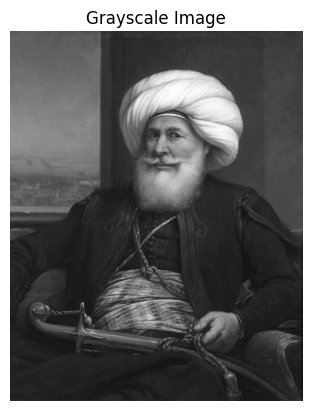

In [10]:
# Load a colored image
image = cv2.imread(filename='./basha.jpg')  
print('Image Shape: ', image.shape)  ## Height x Width x Channels (BGR)

# Convert to grayscale
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)

# Save the grayscale image (if you want)
cv2.imwrite('./gray_basha.jpg', gray_image)  

# Display the grayscale image using matplotlib
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

* `Colored to binary`
> `Converting a color image to a binary image involves a two-step process: first converting the color image to a grayscale image, and then applying a threshold to convert the grayscale image to a binary image.`
> `Once you have a grayscale image, you apply a thresholding operation. This operation sets all pixel values above a certain threshold to the maximum value (usually 255, which represents white) and all pixel values below the threshold to the minimum value (usually 0, which represents black).`

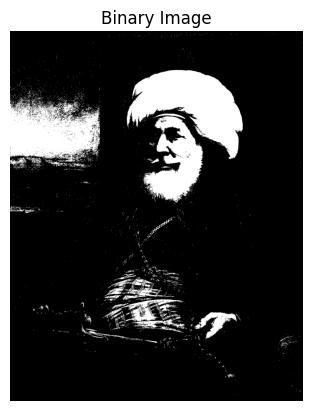

In [11]:
# Load a colored image
image = cv2.imread(filename='./basha.jpg')

# Convert to grayscale
gray_image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)

# Convert to binary image using a threshold
_, binary_image = cv2.threshold(src=gray_image, thresh=127, maxval=255, type=cv2.THRESH_BINARY)

# Save the binary image (if you want)
cv2.imwrite('./binary_basha.jpg', binary_image)

# Display the binary image using matplotlib
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

* `Gray and Binary to Colored`
> * `This operation will take the single-channel image (binary or grayscale) and create a three-channel image where the intensity value is replicated across the blue, green, and red channels.`

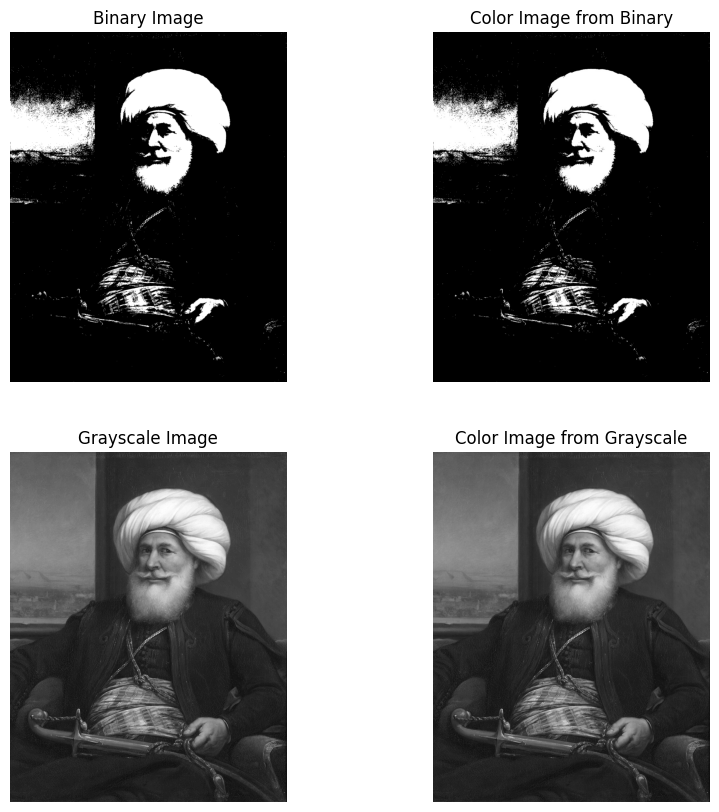

In [12]:
# Load a binary image
binary_image = cv2.imread(filename='./binary_basha.jpg', flags=cv2.IMREAD_GRAYSCALE)

# Load a grayscale image (for demonstration, assuming you have a grayscale image)
gray_image = cv2.imread(filename='./gray_basha.jpg', flags=cv2.IMREAD_GRAYSCALE)

# Convert binary image to color
binary_to_color_image = cv2.cvtColor(src=binary_image, code=cv2.COLOR_GRAY2BGR)

# Convert grayscale image to color
gray_to_color_image = cv2.cvtColor(src=gray_image, code=cv2.COLOR_GRAY2BGR)


# Display the binary, grayscale, and their respective color images using matplotlib
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Color Image from Binary')
plt.imshow(cv2.cvtColor(src=binary_to_color_image, code=cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Grayscale Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Color Image from Grayscale')
plt.imshow(cv2.cvtColor(src=gray_to_color_image, code=cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

---

* `Rotation`
> * `Rotating an image involves rotating it around a specified point, typically the center of the image. The rotation is performed using an affine transformation matrix.`

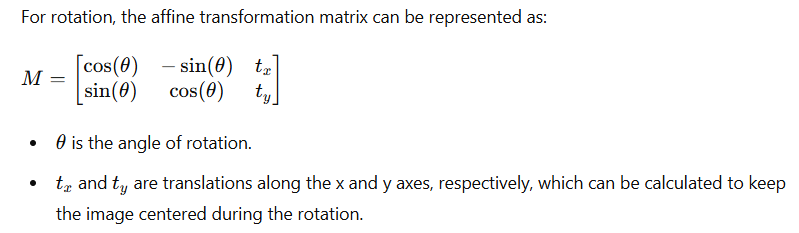

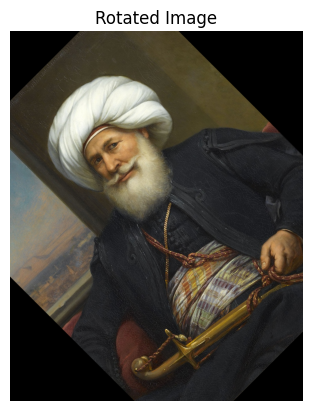

In [13]:
# Load an image
image = cv2.imread(filename='./basha.jpg')

# Get the dimensions of the image
(h, w) = image.shape[:2]

# Define the center of the image
center = (w // 2, h // 2)

# Define the rotation matrix
angle = 45  # Rotation angle in degrees
M = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1.0)  # scale: This parameter allows you to scale the image while rotating -> (1.0 = original size)

# Perform the rotation
rotated = cv2.warpAffine(src=image, M=M, dsize=(w, h))       # dsize: destination size: (w, h) -> specify the size of output image

# Display the rotated image
plt.imshow(cv2.cvtColor(src=rotated, code=cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')
plt.show()

* `Shearing`
> `Shearing an image involves shifting its pixels in a direction proportional to their distance from a specified axis.`

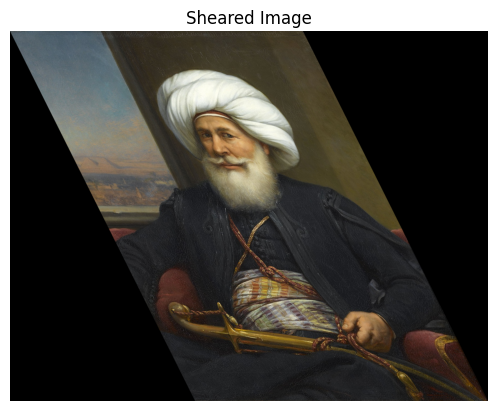

In [14]:
# Load an image
image = cv2.imread(filename='./basha.jpg')

# Define the shearing matrix
shear_factor = 0.5
M = np.array([[1, shear_factor, 0],
              [0, 1, 0]], dtype=np.float32)

# Perform the shearing
(h, w) = image.shape[:2]
sheared = cv2.warpAffine(src=image, M=M, dsize=(int(w + shear_factor * h), h))  # shearing in x -> width = w + shearing_factor * height

# Display the sheared image
plt.imshow(cv2.cvtColor(src=sheared, code=cv2.COLOR_BGR2RGB))
plt.title('Sheared Image')
plt.axis('off')
plt.show()

* `Trasnaltion`
> `Translation involves shifting an image along the x and y axes.`

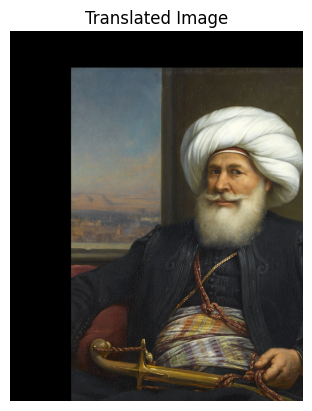

In [15]:
# Load an image
image = cv2.imread(filename='./basha.jpg')

# Define the translation matrix
tx, ty = 250, 150  # Translation in x and y directions
M = np.float32([[1, 0, tx],
                [0, 1, ty]])

# Perform the translation
translated = cv2.warpAffine(src=image, M=M, dsize=(image.shape[1], image.shape[0]))  # warpAffine: (width, height) not (height x width)

# Display the translated image
plt.imshow(cv2.cvtColor(src=translated, code=cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.axis('off')
plt.show()

`Scaling`
> `Scaling an image involves resizing it either by enlarging or reducing its dimensions.`

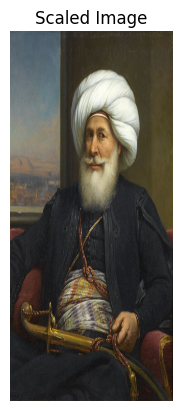

In [16]:
# Load an image
image = cv2.imread(filename='./basha.jpg')

# Define the scaling factors
scale_x = 2.5  # Scale factor in x direction
scale_y = 4.5  # Scale factor in y direction

# Perform the scaling
scaled = cv2.resize(src=image, dsize=None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)

# Display the scaled image
plt.imshow(cv2.cvtColor(src=scaled, code=cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')
plt.axis('off')
plt.show()

---